In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import random

In [2]:
file_train = []
with open('lab_1_train.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        file_train.append(row)
    #print(file)

In [3]:
array = dict()

for row in file_train:
    i,x,y = row.values()
    array[float(x)] = float (y)
    #print(i+" "+x+" "+y)

x_list = list(array.keys())
y_list = list(array.values())

m = len(x_list)

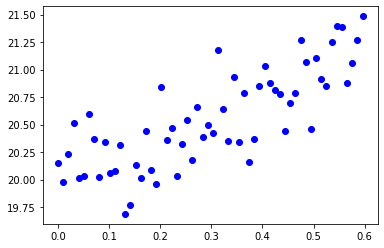

In [4]:
plt.plot(x_list, y_list, "bo")

In [5]:
def predict (teta, x):
    return teta[0] + teta[1] * x

In [6]:
teta = [random.uniform(0, 10), random.uniform(0, 10)]
alpha = 1
tolerance = 0.000001
tetaLast = [0,0]

In [7]:
def checkTolerance (tetaLast, teta, tolerance):
    return ((abs(tetaLast[0]-teta[0])>tolerance) or (abs(tetaLast[1]-teta[1])>tolerance))

def sumTeta0 (teta, x, y, m):
    sumTeta = 0;
    for i in range(m):
        sumTeta += predict(teta, x[i]) - y[i]
    return sumTeta

def sumTeta1 (teta, x, y, m):
    sumTeta = 0;
    for i in range(0,m):
        sumTeta += (predict(teta, x[i]) - y[i]) * x[i]
    return sumTeta

def lossFunc (teta, x, y, m):
    sumLoss = 0;
    for i in range(0,m):
        sumLoss += (y[i] - predict(teta, x[i])) ** 2
    return sumLoss / (2 * m)

In [8]:
print("Start teta")
print("teta 0 = ",teta[0],"; teta 1 = ",teta[1],"\n")

print("Gradient")
while(checkTolerance(tetaLast, teta, tolerance)):
    tetaLast = teta.copy()
    teta[0] = teta[0] - (alpha/m) * sumTeta0(teta, x_list, y_list, m);
    teta[1] = teta[1] - (alpha/m) * sumTeta1(teta, x_list, y_list, m);
    loss = lossFunc(teta, x_list, y_list, m)
    print("teta 0 = ",teta[0],"; teta 1 = ",teta[1],"; loss = ", loss)
    
print("\nResult\nteta 0 = ",teta[0],"; teta 1 = ",teta[1],"; loss = ", loss)

Start teta
teta 0 =  2.716966872997703 ; teta 1 =  6.476581908326264 

Gradient
teta 0 =  18.61967262239577 ; teta 1 =  6.338946537471649 ; loss =  0.3282328708654034
teta 0 =  18.660685182397906 ; teta 1 =  6.20552289415934 ; loss =  0.31065269273287843
teta 0 =  18.70044273267784 ; teta 1 =  6.076182096919547 ; loss =  0.2941319812242055
teta 0 =  18.738983677309896 ; teta 1 =  5.950799208135236 ; loss =  0.278606887752721
teta 0 =  18.776345245179968 ; teta 1 =  5.829253113357785 ; loss =  0.26401741155662667
teta 0 =  18.812563525946988 ; teta 1 =  5.711426404315667 ; loss =  0.25030716781043794
teta 0 =  18.847673504903984 ; teta 1 =  5.597205265503138 ; loss =  0.23742316971116273
teta 0 =  18.88170909677236 ; teta 1 =  5.486479364239384 ; loss =  0.22531562369701766
teta 0 =  18.914703178462066 ; teta 1 =  5.379141744091911 ; loss =  0.21393773700725713
teta 0 =  18.946687620829245 ; teta 1 =  5.27508872156127 ; loss =  0.20324553683937902
teta 0 =  18.977693319462112 ; teta 1 =

teta 0 =  19.95991361648026 ; teta 1 =  1.97882280128051 ; loss =  0.03651753393073916
teta 0 =  19.959913972475064 ; teta 1 =  1.9788216431444738 ; loss =  0.03651753392941462
teta 0 =  19.959914317576207 ; teta 1 =  1.978820520448117 ; loss =  0.0365175339281698
teta 0 =  19.95991465211704 ; teta 1 =  1.978819432106964 ; loss =  0.036517533927000086
teta 0 =  19.959914976420716 ; teta 1 =  1.978818377069724 ; loss =  0.03651753392590087
teta 0 =  19.959915290800502 ; teta 1 =  1.9788173543172758 ; loss =  0.03651753392486785
teta 0 =  19.95991559556007 ; teta 1 =  1.9788163628616857 ; loss =  0.03651753392389708

Result
teta 0 =  19.95991559556007 ; teta 1 =  1.9788163628616857 ; loss =  0.03651753392389708


In [9]:
def optimalTeta(x_list,y_list, m,tetaOptimal):
    sum_x, sum_x2, sum_y, sum_xy = 0,0,0,0
    for i in range(m):
        sum_x += x_list[i]
        sum_x2 += x_list[i] ** 2
        sum_y += y_list[i]
        sum_xy += x_list[i] * y_list[i]
        
    
    tetaOptimal[0] = (sum_xy - 1 / m * sum_x * sum_y) / (sum_x2 - 1 / m * (sum_x ** 2))
    tetaOptimal[1] = sum_y / m - tetaOptimal[0] * (sum_x / m)
    print("\nOptimal\nteta 0 = ",tetaOptimal[0],"; teta 1 = ",tetaOptimal[1])
  
tetaOptimal = [0,0]
optimalTeta(x_list,y_list, m, tetaOptimal)


Optimal
teta 0 =  1.978784954463182 ; teta 1 =  19.95992525006205


In [10]:
file_test = []
with open('lab_1_test.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        file_test.append(row)
    #print(file)

In [11]:
arrayt = dict()

for row in file_test:
    i,x,y = row.values()
    arrayt[float(x)] = float (y)
    #print(i+" "+x+" "+y)

xt_list = list(arrayt.keys())
yt_list = list(arrayt.values())

mt = len(xt_list)

lossTest = lossFunc(teta, xt_list, yt_list, mt)
print("Loss in test case = ",lossTest)

Loss in test case =  0.03779284246779491


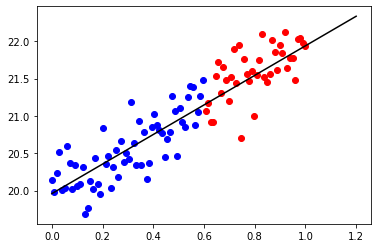

In [12]:
x0 = 0
y0 = teta[0] + teta[1] * x0
x1 = 1.2
y1 = teta[0] + teta[1] * x1

plt.plot (x_list, y_list, 'bo')
plt.plot (xt_list, yt_list,'ro')
plt.plot ([x0,x1],[y0,y1], 'black')

#optimal

#x0 = 0
#y0 = tetaOptimal[1] + tetaOptimal[0] * x0
#x1 = 1.2
#y1 = tetaOptimal[1] + tetaOptimal[0] * x1
#plt.plot ([x0,x1],[y0,y1], 'green')